In [1]:
# import tensorflow, keras and pandas

import tensorflow as tf
from tensorflow import keras
import pandas as pd

/Users/digvijay.upadhyay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# read data file
# shuffle the rows since we had removed some columns and rows
# to achieve better accuracy 
data = pd.read_csv('data/data_cleaned_up.csv', na_values=['.'])
data = data.sample(frac=1)
print(data.describe)

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  num
236   54    1   4       140   216    0        0      105      0      1.5    1
110   52    1   2       160   196    0        0      165      0      0.0    0
218   58    1   3       160   211    1        1       92      0      0.0    1
130   54    1   2       160   305    0        0      175      0      0.0    0
178   48    1   4       106   263    1        0      110      0      0.0    1
138   55    1   2       145   326    0        0      155      0      0.0    0
36    40    1   2       130   275    0        0      150      0      0.0    0
35    39    1   4       130   307    0        0      140      0      0.0    0
204   48    1   4       122   275    1        1      150      1      2.0    1
11    35    0   1       120   160    0        1      185      0      0.0    0
90    49    1   3       140   187    0        0      172      0      0.0    0
43    41    1   2       120   

In [3]:
# separate the output data (column 'num') from rest of the data
values_series = data['num']
x_data = data.pop('num')

# split input(x) and output (y) data 
# for training and testing
train_x_data = data[0:100]
train_y_data = x_data[0:100]
train_x_data = train_x_data.values
train_y_data = train_y_data.values

test_x_data = data[100:]
test_y_data = x_data[100:]
test_x_data = test_x_data.values
test_y_data = test_y_data.values


print(train_x_data[0])
print(train_y_data[0])

print(train_x_data.shape)

[ 54.    1.    4.  140.  216.    0.    0.  105.    0.    1.5]
1
(100, 10)


In [4]:
# create model
model = keras.Sequential()

# add layers
model.add(keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(train_x_data.shape[1],)))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))

# last layer has only two possible outcomes
# either 0 or 1 indicating not diagnosed and diagnosed respectively
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# get summary of the model
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 3,439
Trainable params: 3,439
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile the model
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
# model fitting, we train and test the data
history = model.fit(train_x_data,
                    train_y_data,
                    epochs=40,
                    batch_size=256,
                    validation_data=(test_x_data, test_y_data),
                    verbose=1)

Train on 100 samples, validate on 160 samples
Epoch 1/40
100/100 [==============================] - 0s 3ms/step - loss: 5.1371 - acc: 0.4000 - val_loss: 4.0750 - val_acc: 0.3625
Epoch 2/40
100/100 [==============================] - 0s 22us/step - loss: 3.7225 - acc: 0.4000 - val_loss: 2.6069 - val_acc: 0.3625
Epoch 3/40
100/100 [==============================] - 0s 23us/step - loss: 2.3368 - acc: 0.4000 - val_loss: 1.3622 - val_acc: 0.4313
Epoch 4/40
100/100 [==============================] - 0s 27us/step - loss: 1.1822 - acc: 0.4700 - val_loss: 0.7186 - val_acc: 0.5875
Epoch 5/40
100/100 [==============================] - 0s 23us/step - loss: 0.6439 - acc: 0.6000 - val_loss: 0.8430 - val_acc: 0.6375
Epoch 6/40
100/100 [==============================] - 0s 29us/step - loss: 0.8766 - acc: 0.6100 - val_loss: 1.1645 - val_acc: 0.6375
Epoch 7/40
100/100 [==============================] - 0s 65us/step - loss: 1.2597 - acc: 0.6000 - val_loss: 1.3551 - val_acc: 0.6375
Epoch 8/40
100/100 [====

In [7]:
# evaluate the model
results = model.evaluate(test_x_data, test_y_data)

print(results)

160/160 [==============================] - 0s 33us/step
[0.6922703623771668, 0.6]


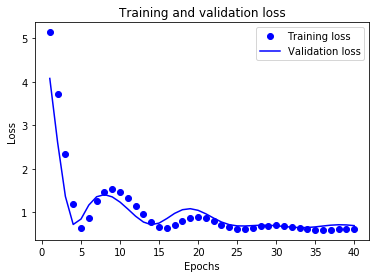

In [10]:
# Create graph for acuracy and loss
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

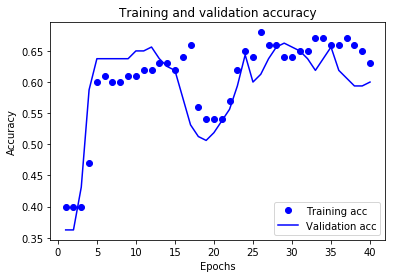

In [9]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()